# **Part 1: OpenCV Basics**

In [95]:
%cd OpenCV/
from IPython.display import clear_output
clear_output()

## **Lesson 1: Changing Image's Color Profiles**




(200, 353, 3)
(200, 353)
(200, 353, 3)


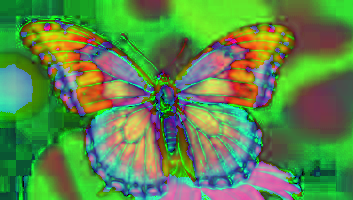

In [96]:
import cv2
from google.colab.patches import cv2_imshow

#colorful image - 3 channels
image = cv2.imread("Images/butterfly.jpeg")
print(image.shape)

#grayscale image
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
print(gray.shape)

#HSV Image
HSV = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
print(HSV.shape)
cv2_imshow(HSV)

## **Lesson 2: Edge Detection**

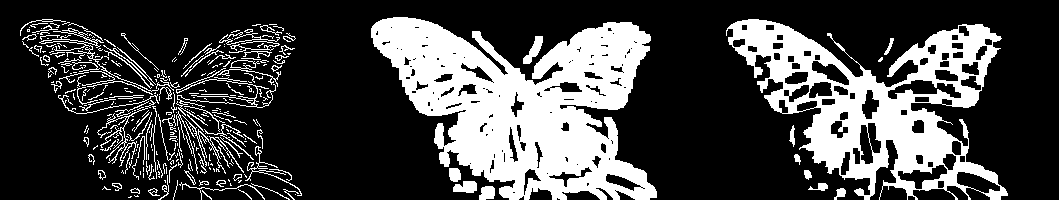

In [97]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

image = cv2.imread("Images/butterfly.jpeg")
# cv2_imshow(image)

gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
canny_image = cv2.Canny(gray,150, 200)
# cv2_imshow(canny_image)

# Erosion and Dilation
kernel = np.ones((5,5), np.uint8)
#Dilation
dilate_image = cv2.dilate(canny_image, kernel, iterations=1)
# cv2_imshow(dilate_image)
#Erosion
# kernel = np.ones((1,1), np.uint8)
erode_image = cv2.erode(dilate_image,kernel, iterations=1)
# cv2_imshow(erode_image)

display = np.hstack((canny_image,dilate_image,erode_image))
cv2_imshow(display)

## **Lesson 3: Image Manipulation**

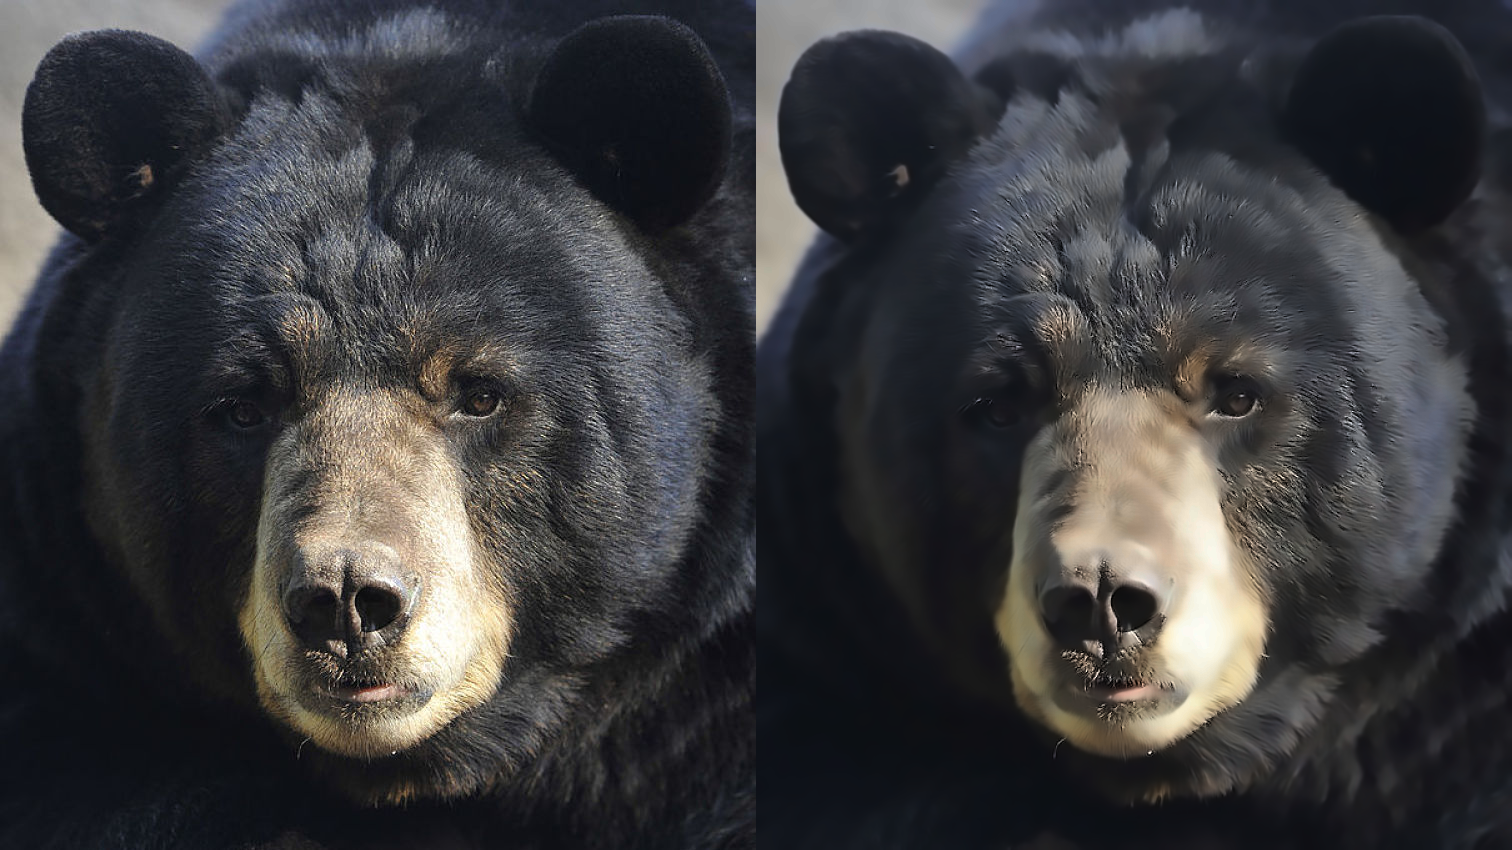

In [98]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

image = cv2.imread("Images/Bear.jpg")
# cv2_imshow(image)
dst = cv2.fastNlMeansDenoisingColored(image, None, 15, 20, 7, 15)

display = np.hstack((image, dst))
cv2_imshow(display)



## **Lesson 4: Drawing Shapes and Writing Text on Images**

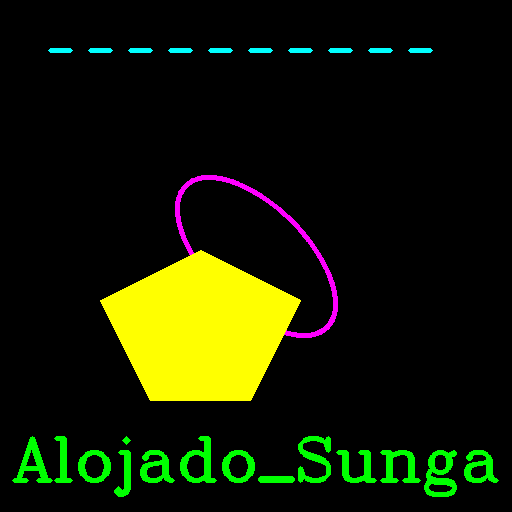

In [99]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = np.zeros((512, 512, 3), np.uint8)
#uint8: 0 to 255

# Drawing Function
# Draw a Ellipse
cv2.ellipse(img, (256, 256), (100, 50), 45, 0, 360, (255, 0, 255), 3)
# Draw a Polygon
# Define points of the polygon
pts = np.array([[100, 300], [200, 250], [300, 300], [250, 400], [150, 400]], np.int32)
pts = pts.reshape((-1, 1, 2))
cv2.fillPoly(img, [pts], (0, 255, 255))
#Draw a Dashed Line
for i in range(50, 450, 40):
    cv2.line(img, (i, 50), (i + 20, 50), (255, 255, 0), 3)
#Write a Text
cv2.putText(img,"Alojado_Sunga",(12,480),cv2.FONT_HERSHEY_COMPLEX,2,(0,255,0),3)
# Displaying the Image
cv2_imshow(img)

# **Part 2: Intermediate Exercises**

## **Lesson 1: Color Detection**

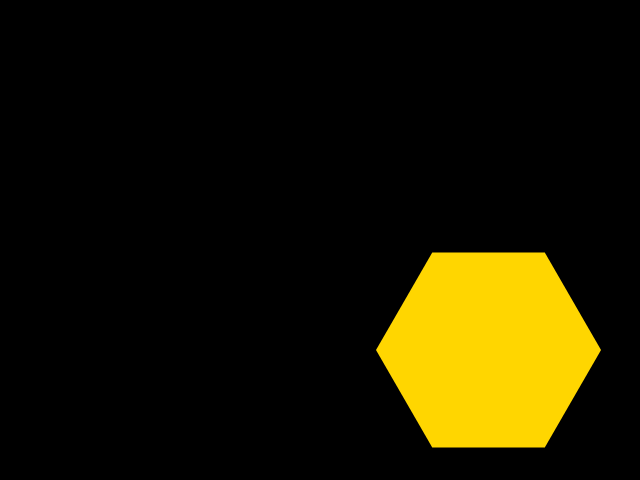

In [100]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
#BGR Image . It is represented in Blue, Green and Red Channels...
image = cv2.imread("Images/shapess.png")
hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)

# Blue Color
# lower_hue = np.array([65,0,0])
# upper_hue = np.array([110, 255,255])

# Red Color
# lower_hue = np.array([0,0,0])
# upper_hue = np.array([20,255, 255])

# Green Color
# lower_hue = np.array([46,0,0])
# upper_hue = np.array([91,255,255])

# Yellow Color
lower_hue = np.array([21,0,0])
upper_hue = np.array([45,255,255])

mask = cv2.inRange(hsv,lower_hue,upper_hue)
# cv2_imshow(mask)
result = cv2.bitwise_and(image, image, mask = mask)
cv2_imshow(result)
# cv2_imshow(image)

## **Lesson 2: Face Detection**

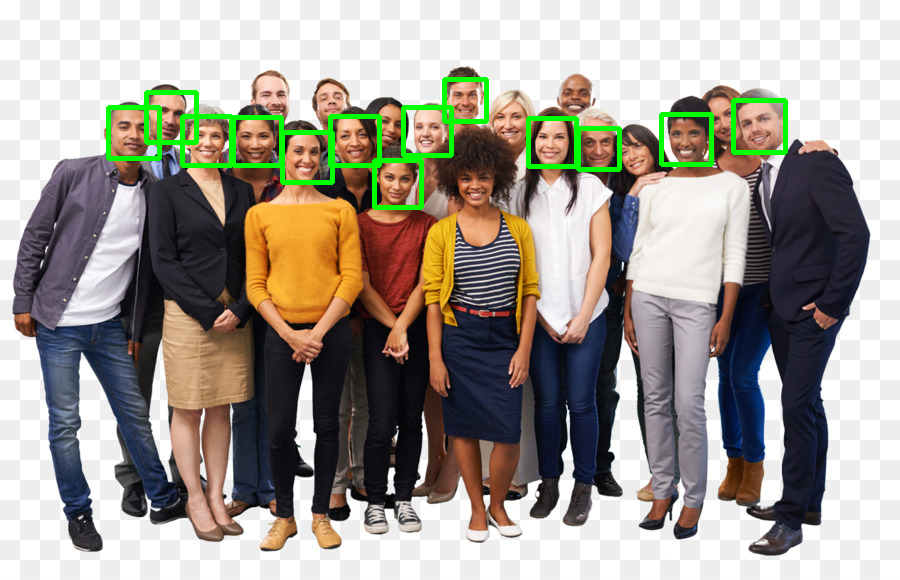

In [101]:
import cv2
from google.colab.patches import cv2_imshow

face_cascade = cv2.CascadeClassifier("files/haarcascade_frontalface_default.xml")
# img = cv2.imread("images/person.jpg")
img = cv2.imread("Images/group.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray,1.3,5)
# print(faces)
for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)

cv2_imshow(img)

## **Lesson 3: Shape Detection**

We have a hexagon here
We found a triangle
We found a circle
We found a square
We found a square


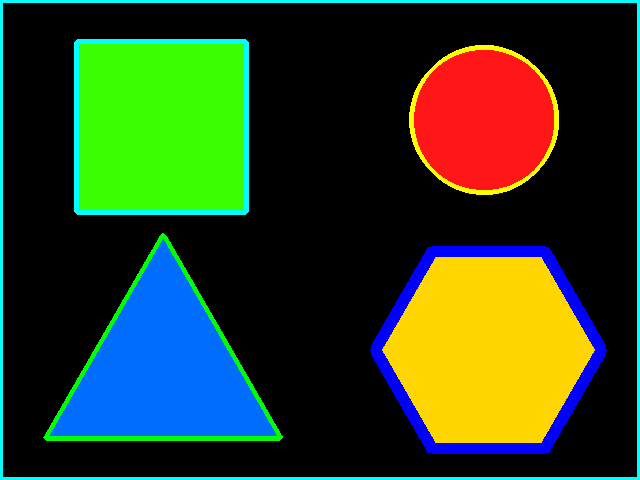

In [102]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread("Images/shapess.png")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray,50,255,1)
contours,h = cv2.findContours(thresh,1,2)
# cv2_imshow(thresh)
for cnt in contours:
  approx = cv2.approxPolyDP(cnt,0.01*cv2.arcLength(cnt,True),True)
  n = len(approx)
  if n==4:
    # this is a Square
    print("We found a square")
    cv2.drawContours(img,[cnt],0,(255,255,0),3)
  elif n>9:
    # this is a circle
    print("We found a circle")
    cv2.drawContours(img,[cnt],0,(0,255,255),3)
  elif n==3:
    # this is a triangle
    print("We found a triangle")
    cv2.drawContours(img,[cnt],0,(0,255,0),3)
  elif n==6:
    # this is a hexagon
    print("We have a hexagon here")
    cv2.drawContours(img,[cnt],0,255,10)
cv2_imshow(img)


# **Part 3: Projects**

In [103]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

ball = []
cap = cv2.VideoCapture("videos/video.mp4")
out = cv2.VideoWriter('balloutput.avi',cv2.VideoWriter_fourcc('M','J','P','G'),10,(1920,1080))
while cap.isOpened():
  ret, frame = cap.read()
  if ret is False:
    break
  hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
  lower_hue = np.array([65,0,0])
  upper_hue = np.array([110, 255,255])
  mask = cv2.inRange(hsv,lower_hue, upper_hue)

  (contours,_)=cv2.findContours(mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

  center = None

  if len(contours)>0:
    c = max(contours, key=cv2.contourArea)
    ((x,y),radius) = cv2.minEnclosingCircle(c)
    M = cv2.moments(c)
    try:
      center = (int(M["m10"]/M["m00"]), int(M["m01"]/M["m00"]))
      cv2.circle(frame, center,10, (255,0,0),-1)
      ball.append(center)
    except:
      pass
    if len(ball)>2:
      for i in range(1,len(ball)):
        cv2.line(frame, ball[i-1], ball[i],(0,0,255),5)
  out.write(frame)
out.release()




## **Project 2: Face Recognition**

In [104]:
!pip install face_recognition
%cd face_recognition

[Errno 2] No such file or directory: 'face_recognition'
/content


In [105]:
import face_recognition
import numpy as np
from google.colab.patches import cv2_imshow
import cv2

# Creating the encoding profiles
face_1 = face_recognition.load_image_file("Face/Jairus.jpg")
face_1_encoding = face_recognition.face_encodings(face_1)[0]

face_2 = face_recognition.load_image_file("Face/Stephen.jpg")
face_2_encoding = face_recognition.face_encodings(face_2)[0]

face_3 = face_recognition.load_image_file("Face/Kathryn.jpg")
face_3_encoding = face_recognition.face_encodings(face_3)[0]

known_face_encodings = [
                        face_1_encoding,
                        face_2_encoding,
                        face_3_encoding
]

known_face_names = [
                    "Jairus Sunga",
                    "Stephen Grabirel Alojado",
                    "Kathryn Bernardo"
]

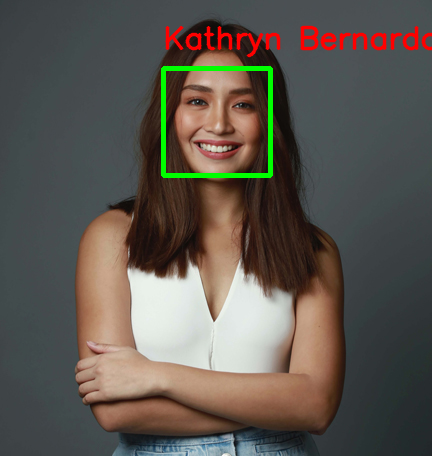

In [106]:

file_name = "Face/Unknown_Kat.jpg"
unknown_image = face_recognition.load_image_file(file_name)
unknown_image_to_draw = cv2.imread(file_name)

face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

for (top,right, bottom, left), face_encoding in zip(face_locations, face_encodings):
  matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

  name = "Unknown"

  face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
  best_match_index = np.argmin(face_distances)
  if matches[best_match_index]:
    name = known_face_names[best_match_index]
  cv2.rectangle(unknown_image_to_draw, (left, top), (right, bottom),(0,255,0),3)
  cv2.putText(unknown_image_to_draw,name, (left, top-20), cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2, cv2.LINE_AA)

cv2_imshow(unknown_image_to_draw)
